In [186]:
import pandas as pd
import csv

import sys
sys.path.insert(0, '../')

import seaborn as sns
import matplotlib.pyplot as plt

import collections
from collections import defaultdict

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [193]:
pip install gensim

     |████████████████████████████████| 23.1 MB 93 kB/s  eta 0:00:01
     |████████████████████████████████| 56 kB 13.4 MB/s eta 0:00:01
  Created wheel for gensim: filename=gensim-4.0.1-cp39-cp39-macosx_10_9_x86_64.whl size=23793294 sha256=1ee6c983a538c3cd3c0ea98424bb5f0cb552665ba3b793ae6eec0bf324125a60
  Stored in directory: /Users/mariabrullmartinez/Library/Caches/pip/wheels/20/74/75/72ec1172891bdecb4ee73fbc2c71d5a150f165b1d0c2ea04e1
Successfully built gensim
Note: you may need to restart the kernel to use updated packages.


### Import data, it is divided into train, test and dev set.

In [69]:
col_names=['genre', 'file', 'year', 'feature_1','feature_2', 'sentence_1', 'sentence_2', 'feature_3','feature_4']

df_train=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-train.xls', header=None, names=col_names)
df_train["sent1_length"]= df_train["sentence_1"].str.len()
df_train["sent2_length"]= df_train["sentence_2"].str.len()

df_test=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-test.xls', header=None, names=col_names)
df_test["sent1_length"]= df_test["sentence_1"].str.len()
df_test["sent2_length"]= df_test["sentence_2"].str.len()

df_dev=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-dev.xls', header=None, names=col_names)
df_dev["sent1_length"]= df_dev["sentence_1"].str.len()
df_dev["sent2_length"]= df_dev["sentence_2"].str.len()

df=pd.concat([df_train, df_test, df_dev])

### Analyze the size of each set

In [3]:
print ('The lenght of the train dataset is :', df_train.shape)
print ('The lenght of the test dataset is :', df_test.shape)
print ('The lenght of the dev dataset is :', df_dev.shape)
print ('The lenght of the total dataset is :', df.shape)

The lenght of the train dataset is : (5749, 11)
The lenght of the test dataset is : (1379, 11)
The lenght of the dev dataset is : (1500, 11)
The lenght of the total dataset is : (8628, 11)


### Groupby each different genre to understand the type of sentences.

In [67]:
df.groupby('genre').size().sort_values(ascending=False)

genre
main-news        4299
main-captions    3250
main-forums       629
main-forum        450
dtype: int64

In [77]:
df.groupby('genre')['sent1_length'].mean().sort_values(ascending=False)

genre
main-news        72.258897
main-forums      67.693164
main-forum       45.904444
main-captions    39.370154
Name: sent1_length, dtype: float64

### Obtain the length of the sentences.

In [88]:
def hist_length(df):
    
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x='sent1_length', hue='genre')
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x='sent2_length', hue='genre')
    
    print('\n Average lenght of sentences_1 :', df["sent1_length"].mean(), '\n' )
    print('Average length of sentences_1 per genre: \n',  df.groupby('genre')['sent1_length'].mean().sort_values(ascending=False), '\n')
    
    print('\n Average lenght of sentences_2 :', df["sent2_length"].mean(), '\n')
    print('Average length of sentences_2 per genre: \n',  df.groupby('genre')['sent2_length'].mean().sort_values(ascending=False))
    
    


 Average lenght of sentences_1 : 57.6397634371195 

Average length of sentences_1 per genre: 
 genre
main-news        70.575629
main-forum       45.904444
main-captions    38.942500
Name: sent1_length, dtype: float64 


 Average lenght of sentences_2 : 57.38344417220861 

Average length of sentences_2 per genre: 
 genre
main-news        70.212473
main-forum       45.839729
main-captions    38.958500
Name: sent2_length, dtype: float64


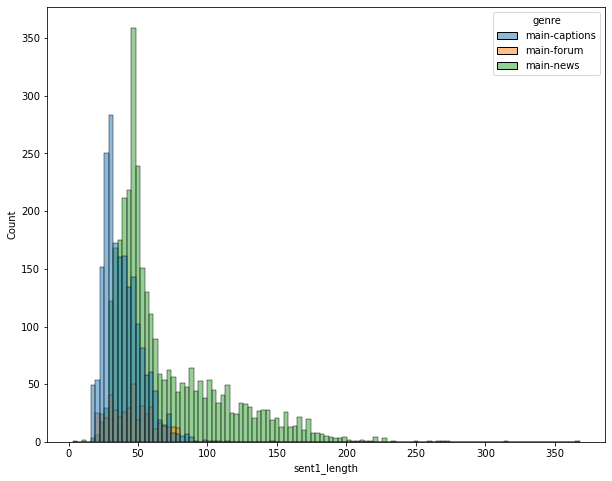

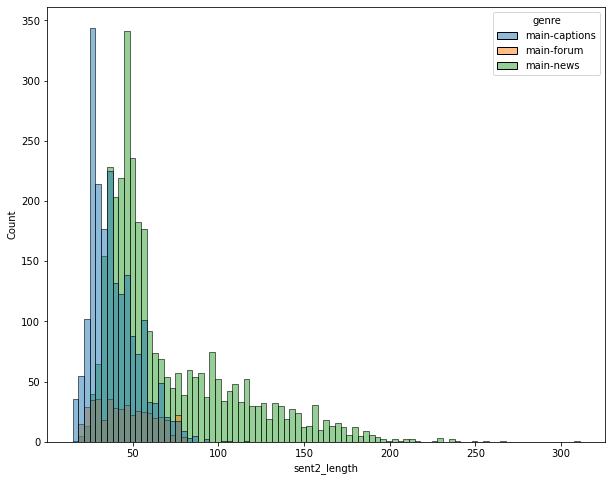

In [89]:
hist_length(df_train)

### Frequency of words and stop words

In [6]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def stop_words_normal_words(df, sentence):
    corpus=[]

    sentences= df[sentence].str.split()
    words=sentences.values.tolist()
    corpus=[word for i in words for word in i]

    dict_stop_word_count=defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dict_stop_word_count[word]+=1 
            
    stop_words_list=list(dict_stop_word_count.keys())
    count_stop_words_list=list(dict_stop_word_count.values())
    
    plt.figure(figsize=(25,20))         
    sns.barplot( count_stop_words_list, stop_words_list).set_title('Stop words frequency')
    
    print('The total length of our vocab is:', len(stop_words_list))
    
    ##stop_words
    counter=collections.Counter(corpus)
    most_common_words=counter.most_common()
    
    word_list=[]
    count_word_list = []
    
    for word,count in most_common_words[:150]:
        if (word not in stop_words):
            word_list.append(word)
            count_word_list.append(count)
        
    plt.figure(figsize=(20,18))        
    sns.barplot( count_word_list, word_list).set_title('Words frequency')
    
    print('The total sum of stop words is:', len(word_list))

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The total length of our vocab is: 131
The total sum of stop words is: 94


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


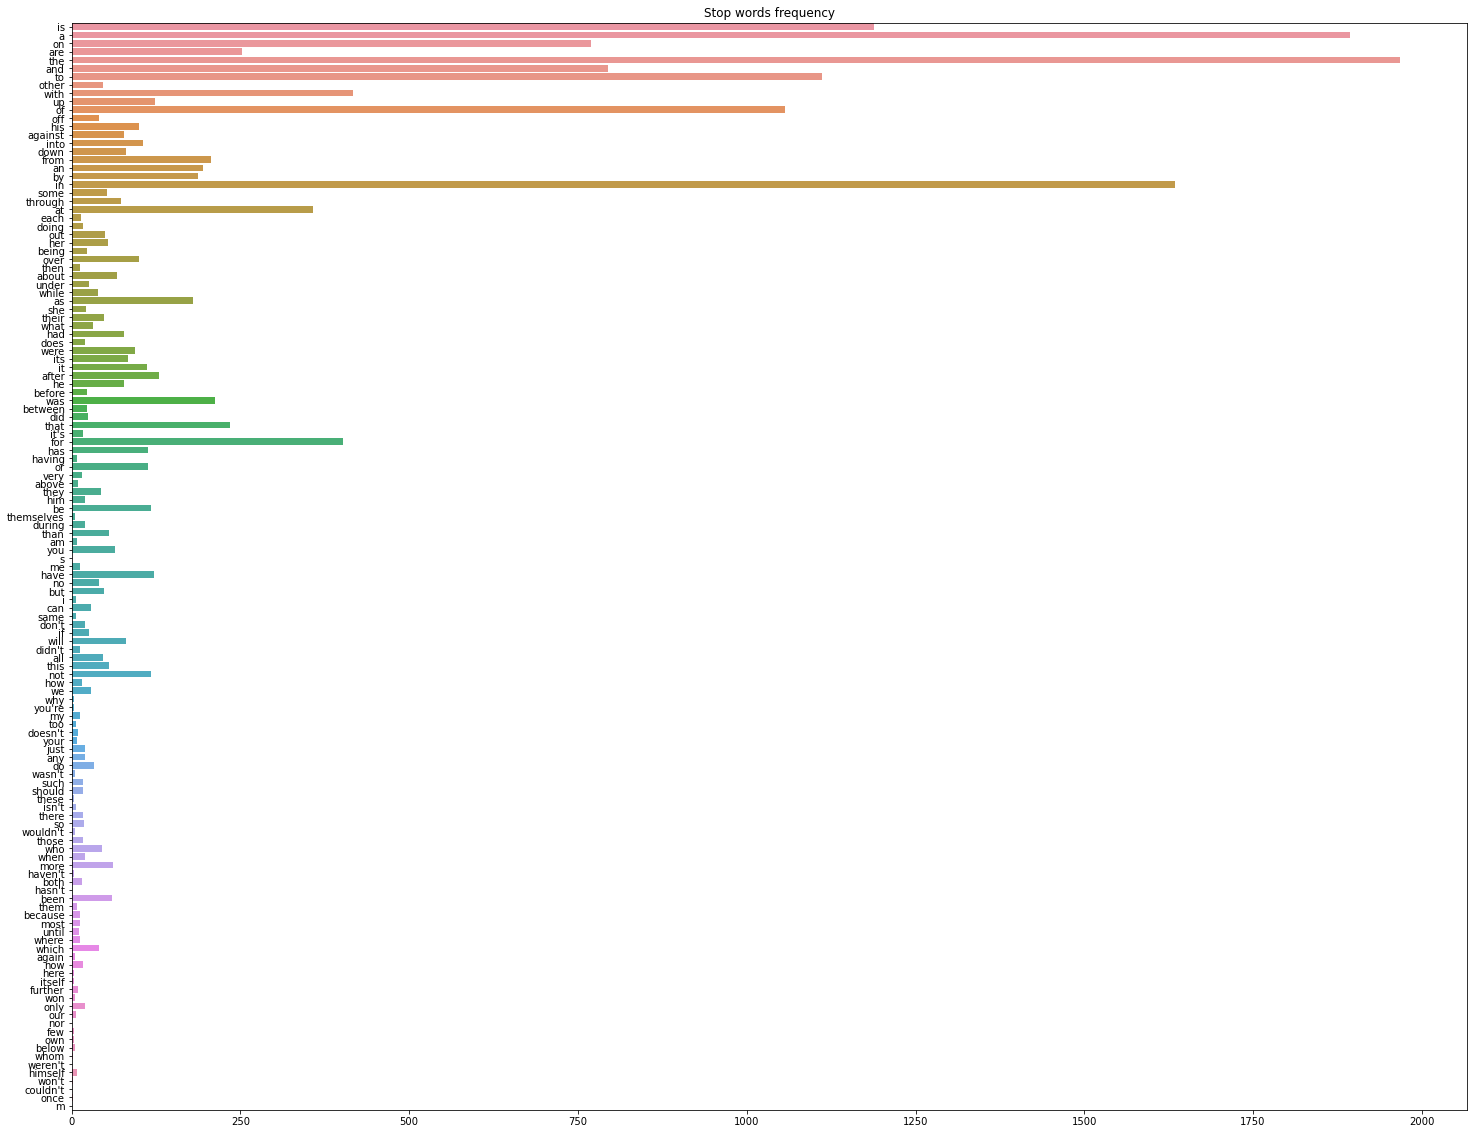

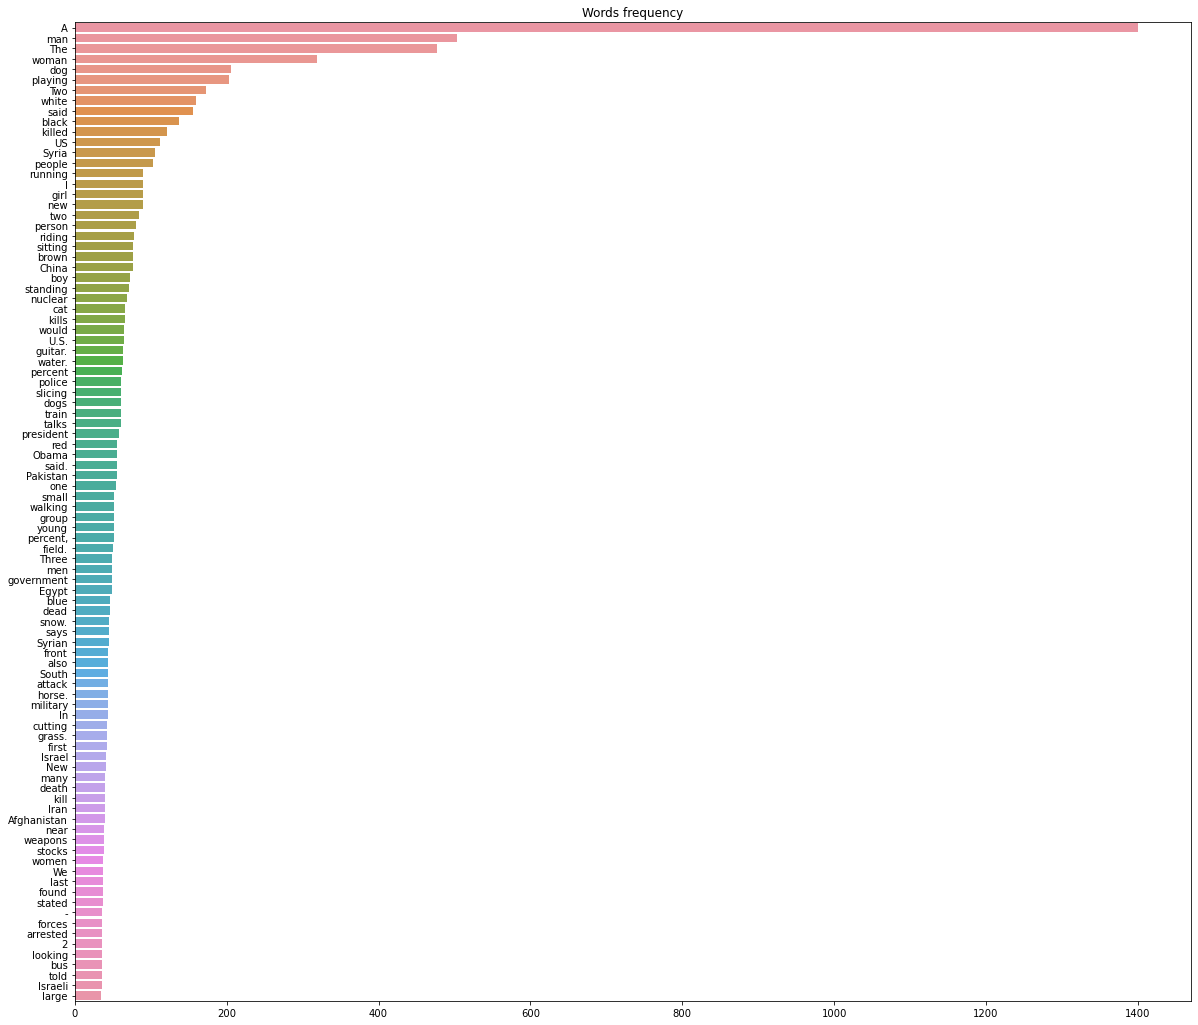

In [64]:
stop_words_normal_words(df_train, 'sentence_1')

### N-gram exploration

In [149]:
def get_top_pair_words(data, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    plt.figure(figsize=(20,18))  
    word,count=map(list,zip(*words_freq[0:20]))
    g=sns.barplot(count, word).set_title('Two pair words frequency')
   
    


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


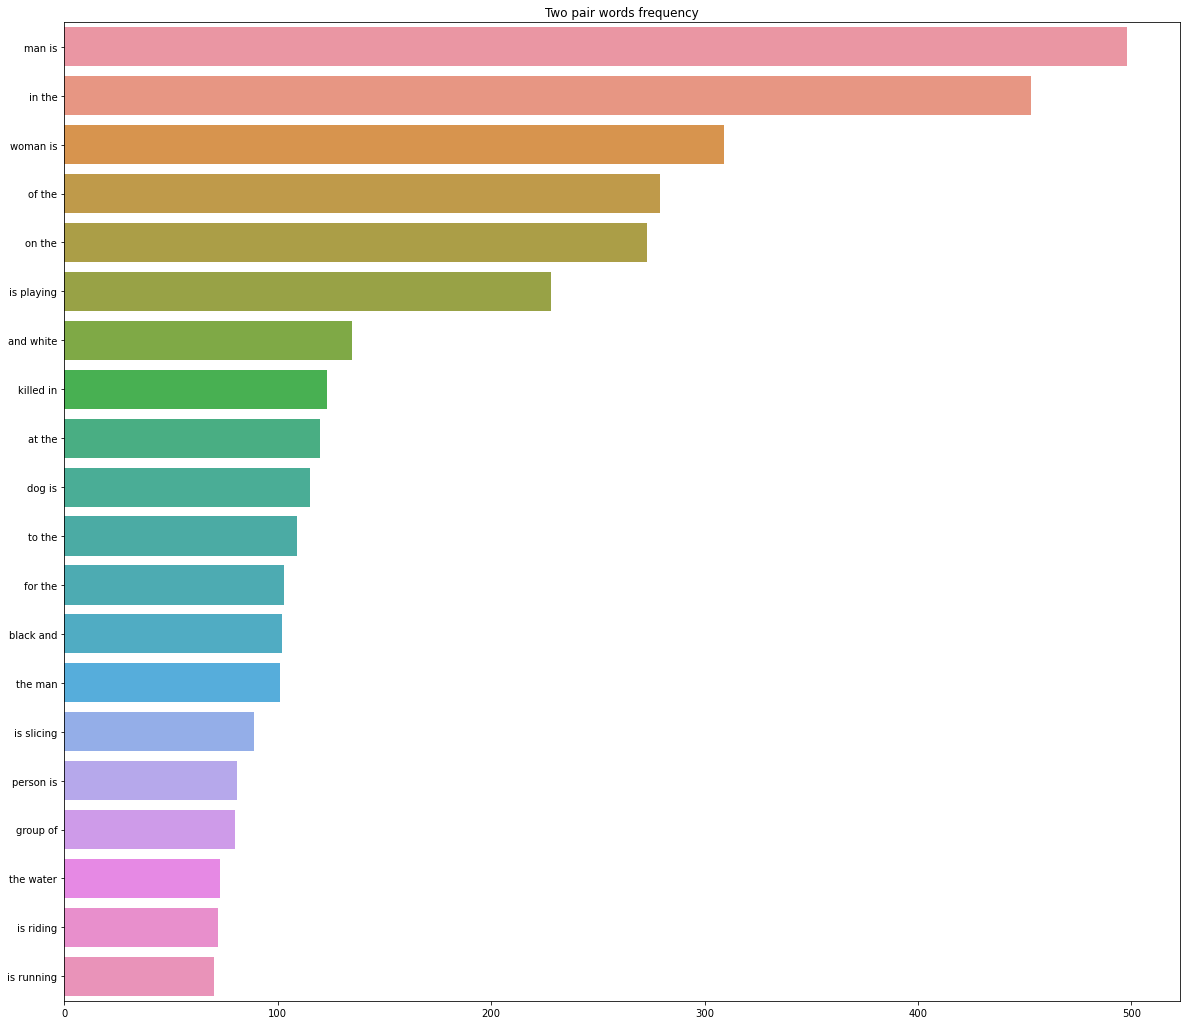

In [150]:
get_top_pair_words(df['sentence_1'], 2)


### Word cloud

In [175]:
def get_word_cloud(data):
    stop_words = nltk.corpus.stopwords.words("english")
    
    word_cloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    word_cloud=word_cloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.show()


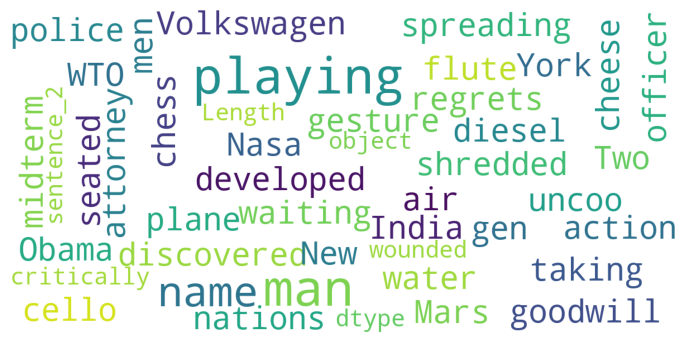

In [178]:
get_word_cloud(df['sentence_2'])

In [179]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [189]:

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['sentence_1']:
        words=[w for w in word_tokenize(news) if (w not in stop_words)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus


In [190]:
corpus=preprocess_news(df)


In [191]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

NameError: name 'gensim' is not defined